About Dataset

This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. 
The data set was collected in duration of 15 years and each patient was followed for at least 10 years.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

C:\Users\akash\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\akash\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('Thyroid_Diff.csv')

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
# Age: The age of the patient at the time of diagnosis or treatment.
# Gender: The gender of the patient (male or female).
# Smoking: Whether the patient is a smoker or not.
# Hx Smoking: Smoking history of the patient (e.g., whether they have ever smoked).
# Hx Radiotherapy: History of radiotherapy treatment for any condition.
# Thyroid Function: The status of thyroid function, possibly indicating if there are any abnormalities.
# Physical Examination: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.
# Adenopathy: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.
# Pathology: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.
# Focality: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).
# Risk: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.
# T: Tumor classification based on its size and extent of invasion into nearby structures.
# N: Nodal classification indicating the involvement of lymph nodes.
# M: Metastasis classification indicating the presence or absence of distant metastases.
# Stage: The overall stage of the cancer, typically determined by combining T, N, and M classifications.
# Response: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.
# Recurred: Indicates whether the cancer has recurred after initial treatment.

# EDA and Data preprocessing

In [4]:
# rename the column

df.rename(columns={'Hx Smoking': 'Smoking History',
                   'Hx Radiothreapy': 'Radiotherapy History',
                   'Pathology': 'Types of Thyroid Cancer (Pathology)',
                   'T': 'Tumor',
                   'N': 'Lymph Nodes',
                   'M': 'Cancer Metastasis',
                  'Response' : 'Treatment Response'}, inplace=True)

In [5]:
df.head()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [6]:
df['Recurred'].value_counts()

Recurred
No     275
Yes    108
Name: count, dtype: int64

In [7]:
df.shape

(383, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Age                                  383 non-null    int64 
 1   Gender                               383 non-null    object
 2   Smoking                              383 non-null    object
 3   Smoking History                      383 non-null    object
 4   Radiotherapy History                 383 non-null    object
 5   Thyroid Function                     383 non-null    object
 6   Physical Examination                 383 non-null    object
 7   Adenopathy                           383 non-null    object
 8   Types of Thyroid Cancer (Pathology)  383 non-null    object
 9   Focality                             383 non-null    object
 10  Risk                                 383 non-null    object
 11  Tumor                                383 non-

In [9]:
df.isnull().sum()

Age                                    0
Gender                                 0
Smoking                                0
Smoking History                        0
Radiotherapy History                   0
Thyroid Function                       0
Physical Examination                   0
Adenopathy                             0
Types of Thyroid Cancer (Pathology)    0
Focality                               0
Risk                                   0
Tumor                                  0
Lymph Nodes                            0
Cancer Metastasis                      0
Stage                                  0
Treatment Response                     0
Recurred                               0
dtype: int64

In [10]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Smoking History', 'Radiotherapy History',
       'Thyroid Function', 'Physical Examination', 'Adenopathy',
       'Types of Thyroid Cancer (Pathology)', 'Focality', 'Risk', 'Tumor',
       'Lymph Nodes', 'Cancer Metastasis', 'Stage', 'Treatment Response',
       'Recurred'],
      dtype='object')

In [11]:
df.columns.to_list()

['Age',
 'Gender',
 'Smoking',
 'Smoking History',
 'Radiotherapy History',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Types of Thyroid Cancer (Pathology)',
 'Focality',
 'Risk',
 'Tumor',
 'Lymph Nodes',
 'Cancer Metastasis',
 'Stage',
 'Treatment Response',
 'Recurred']

In [12]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Age
31    22
27    13
40    12
26    12
28    12
      ..
79     1
18     1
69     1
76     1
78     1
Name: count, Length: 65, dtype: int64


Gender
F    312
M     71
Name: count, dtype: int64


Smoking
No     334
Yes     49
Name: count, dtype: int64


Smoking History
No     355
Yes     28
Name: count, dtype: int64


Radiotherapy History
No     376
Yes      7
Name: count, dtype: int64


Thyroid Function
Euthyroid                      332
Clinical Hyperthyroidism        20
Subclinical Hypothyroidism      14
Clinical Hypothyroidism         12
Subclinical Hyperthyroidism      5
Name: count, dtype: int64


Physical Examination
Multinodular goiter            140
Single nodular goiter-right    140
Single nodular goiter-left      89
Normal                           7
Diffuse goiter                   7
Name: count, dtype: int64


Adenopathy
No           277
Right         48
Bilateral     32
Left          17
Extensive      7
Posterior      2
Name: count, dtype: int64


Types of Thyroid Cancer 

In [13]:
df.nunique().to_frame('No. of unique value')

,No. of unique value
Age,65
Gender,2
Smoking,2
Smoking History,2
Radiotherapy History,2
Thyroid Function,5
Physical Examination,5
Adenopathy,6
Types of Thyroid Cancer (Pathology),4
Focality,2


In [14]:
df.duplicated().sum()

19

In [15]:
df.loc[df.duplicated()]

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
32,36,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
38,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
40,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
66,35,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
69,51,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
77,29,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
120,37,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
121,26,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
123,28,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
132,32,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(364, 17)

In [19]:
df.describe()

,Age
count,364.00000
mean,41.25000
std,15.31436
min,15.00000
25%,30.00000
50%,38.00000
75%,52.00000
max,82.00000


# Data Visualization

Univariate Analysis

<Axes: xlabel='Recurred', ylabel='count'>

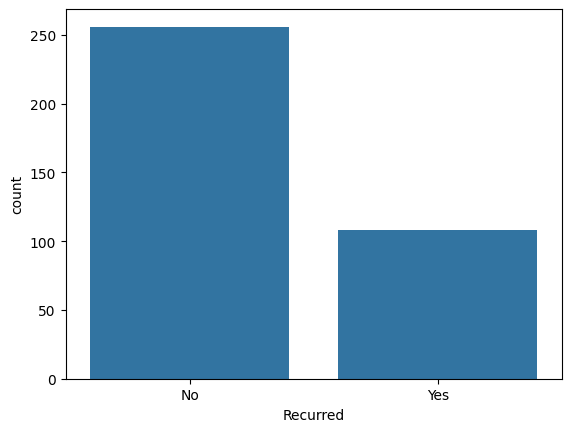

In [20]:
sns.countplot(x='Recurred', data=df)

Here we observe that, the count of non-recurred has high as compared to recurred i.e more number of patients who donot get repeated cancer after initial treatement.This leads to imbalanced data.We will rectify later.

<Axes: xlabel='Smoking', ylabel='count'>

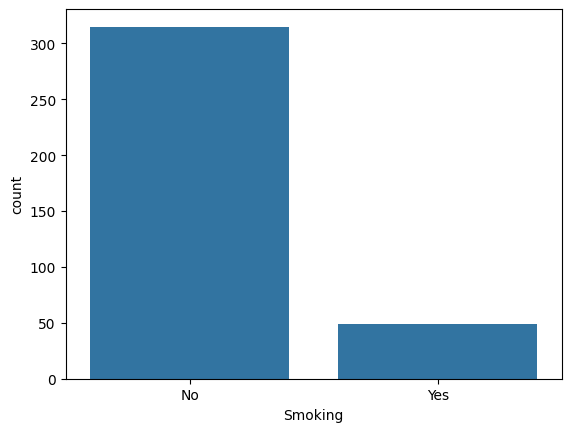

In [21]:
sns.countplot(x='Smoking', data=df)

<Axes: xlabel='Radiotherapy History', ylabel='count'>

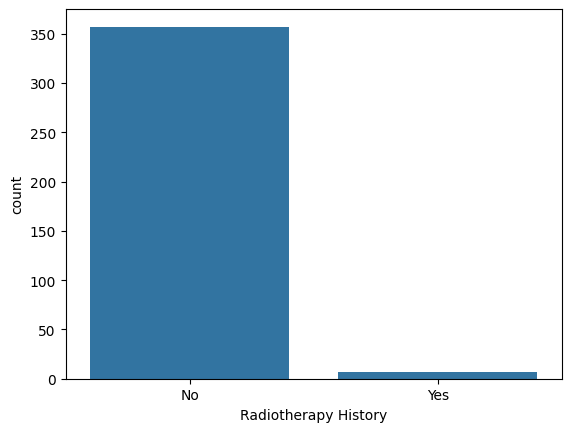

In [22]:
sns.countplot(x='Radiotherapy History', data=df)

<Axes: xlabel='Thyroid Function', ylabel='count'>

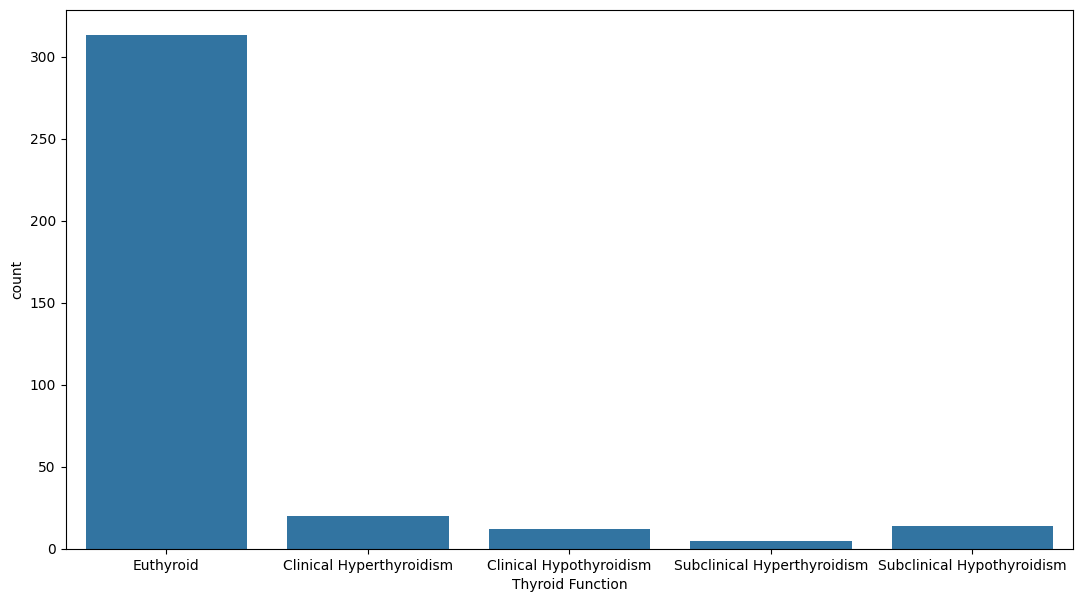

In [23]:
plt.figure(figsize=(13,7))
sns.countplot(x='Thyroid Function', data=df)

<Axes: xlabel='Physical Examination', ylabel='count'>

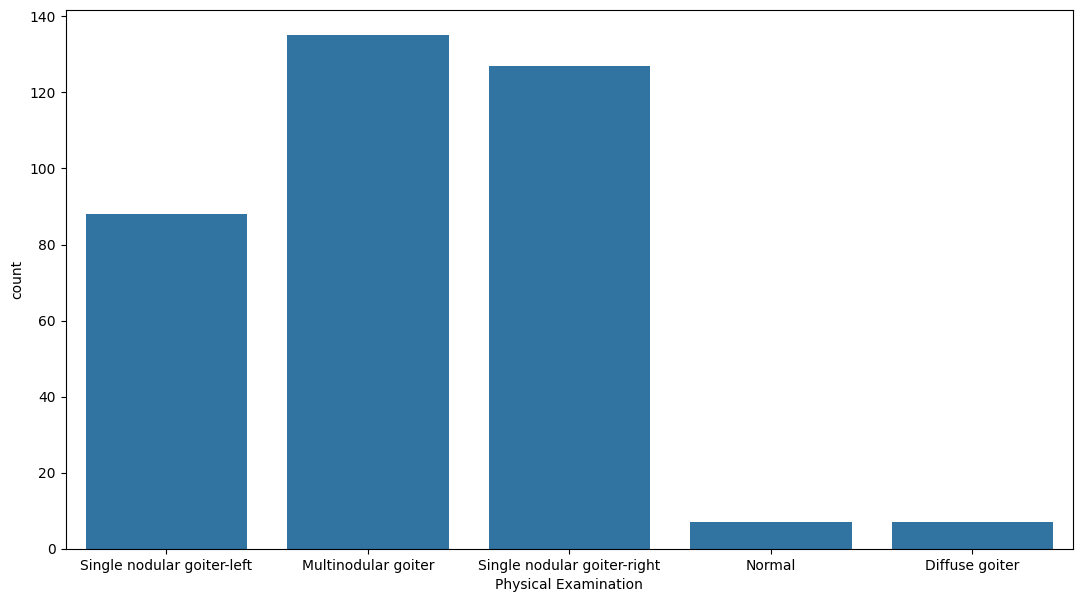

In [24]:
plt.figure(figsize=(13,7))
sns.countplot(x='Physical Examination', data=df)

<Axes: xlabel='Types of Thyroid Cancer (Pathology)', ylabel='count'>

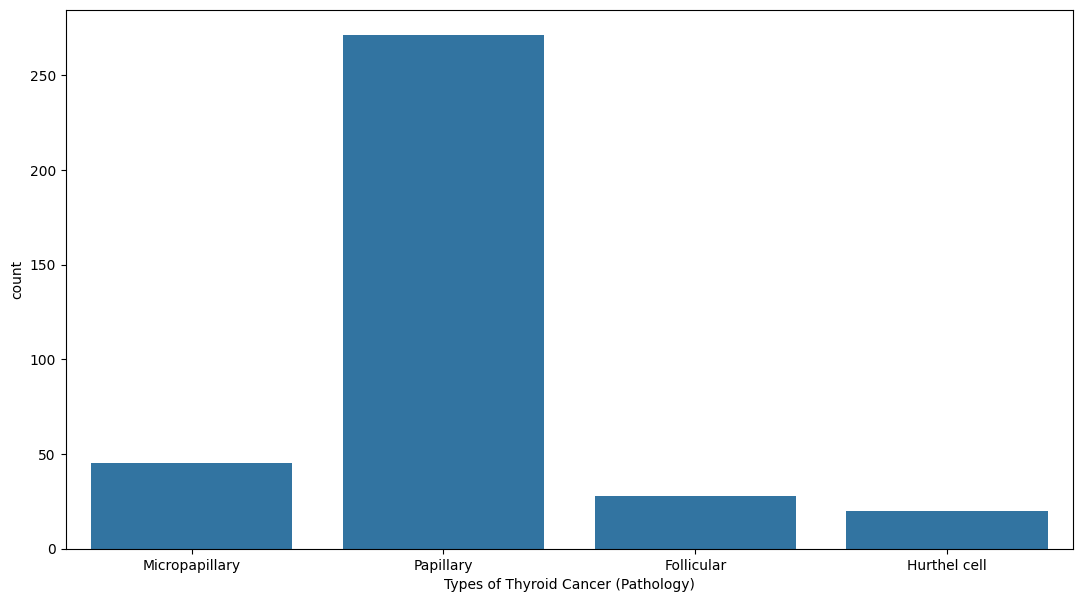

In [25]:
plt.figure(figsize=(13,7))
sns.countplot(x='Types of Thyroid Cancer (Pathology)', data=df)

Here we observe that, more number of patients have Papillary cancer than other type of thyroid cancer.

<Axes: xlabel='Risk', ylabel='count'>

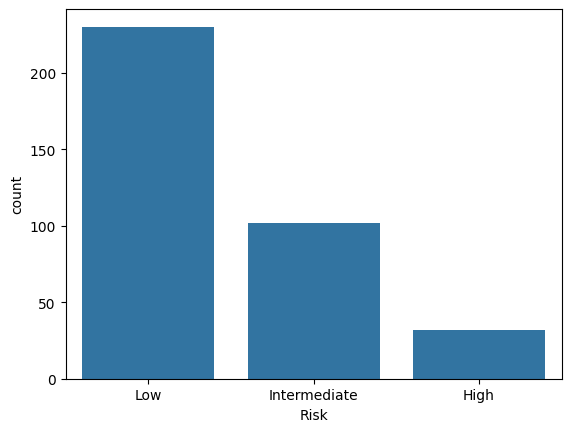

In [26]:
sns.countplot(x='Risk', data=df)

Here we observe that, Low risk patients has high count than other risk.

Bivariate Analysis

<Axes: title={'center': 'Comparison between stage and age'}, xlabel='Stage', ylabel='Age'>

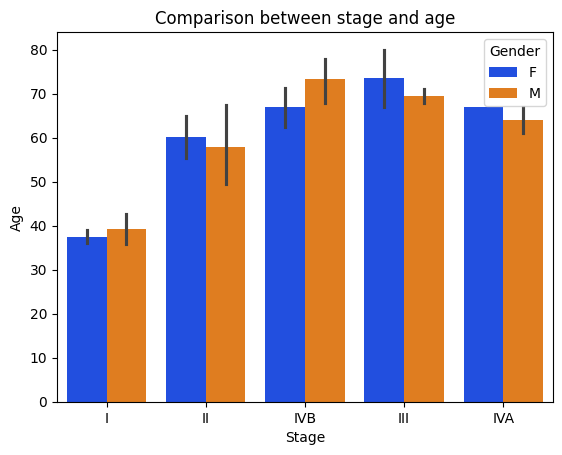

In [27]:
plt.title('Comparison between stage and age')
sns.barplot(x='Stage', y='Age', data=df, hue='Gender', palette='bright')

Here we observe that,

-The older male patients(below 80) belongs to stage IVB is high rate as compared to female.

-The older female(below 80) belongs to stage III is high rate as compared to male.

-In stage IVA, female patients(below 70) has high rate as compared to male patients.

<Axes: title={'center': 'Comparison between Age and smoking'}, xlabel='Smoking', ylabel='Age'>

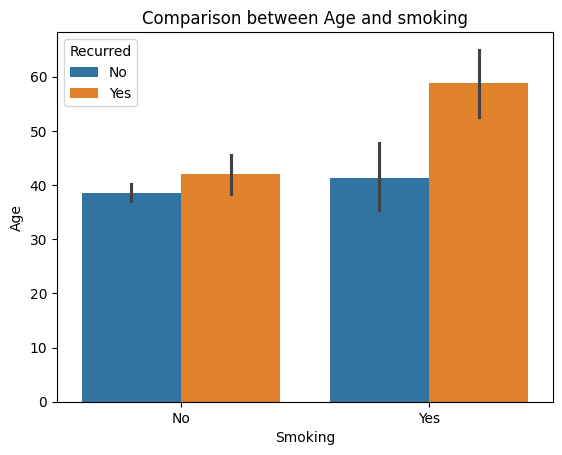

In [28]:
plt.title('Comparison between Age and smoking')
sns.barplot(x='Smoking', y='Age', data=df, hue='Recurred')

Here we observe that,

-The older patients(above 50) who are smoker have high chances to recurred as compared to non-smoker patients who doesn't smoke.

-The yonger patients(below or on 40) who are smoker and non-smoker patients have almost same non-recurred rate.

<Axes: title={'center': 'Comparison between Age and Types of Thyroid Cancer'}, xlabel='Types of Thyroid Cancer (Pathology)', ylabel='Age'>

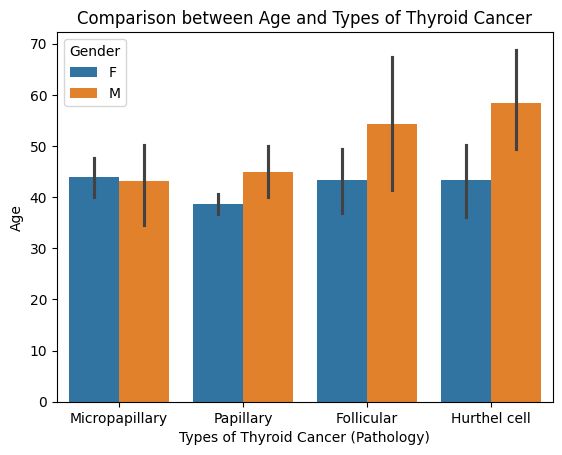

In [29]:
plt.title('Comparison between Age and Types of Thyroid Cancer')
sns.barplot(x='Types of Thyroid Cancer (Pathology)', y='Age', data=df, hue='Gender')

Here we observe that,

-The  male older patients have Follicular and Hurthel Cell type of cancer as compared to other types than female.

<Axes: title={'center': 'Comparison between Age and Types of Thyroid Cancer'}, xlabel='Types of Thyroid Cancer (Pathology)', ylabel='Age'>

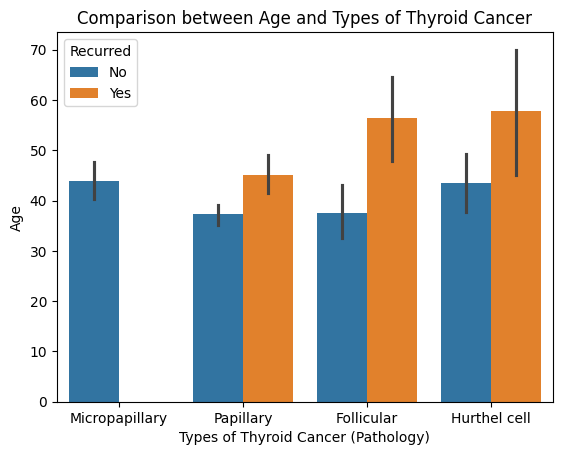

In [30]:
plt.title('Comparison between Age and Types of Thyroid Cancer')
sns.barplot(x='Types of Thyroid Cancer (Pathology)', y='Age', data=df, hue='Recurred')

Here we observe that,

-Basically the two type of cancer like Follicular and Hurthel cell has high chances to recurred between the age from 50 to 60.

<Axes: title={'center': 'Comparison between Age and Risk'}, xlabel='Risk', ylabel='Age'>

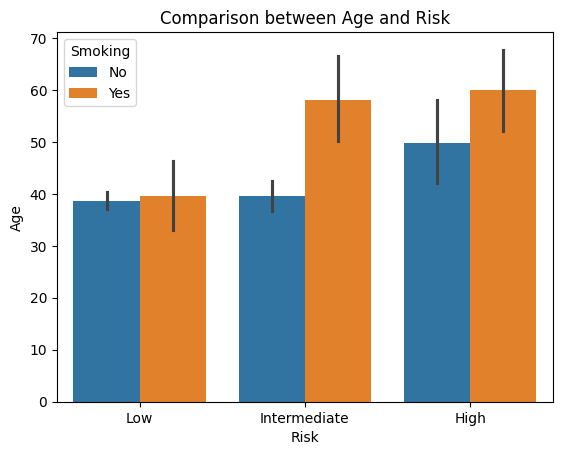

In [31]:
plt.title('Comparison between Age and Risk')
sns.barplot(x='Risk', y='Age', data=df, hue='Smoking')

Here we observed that, 

-The older patients(above 50) who smoke has high risk to get a chance of thyroid cancer as compared to non-smoking patients.

-Yonger patients(below 40) have same status for smoker or non-smoker but risk is low.

<Figure size 800x500 with 0 Axes>

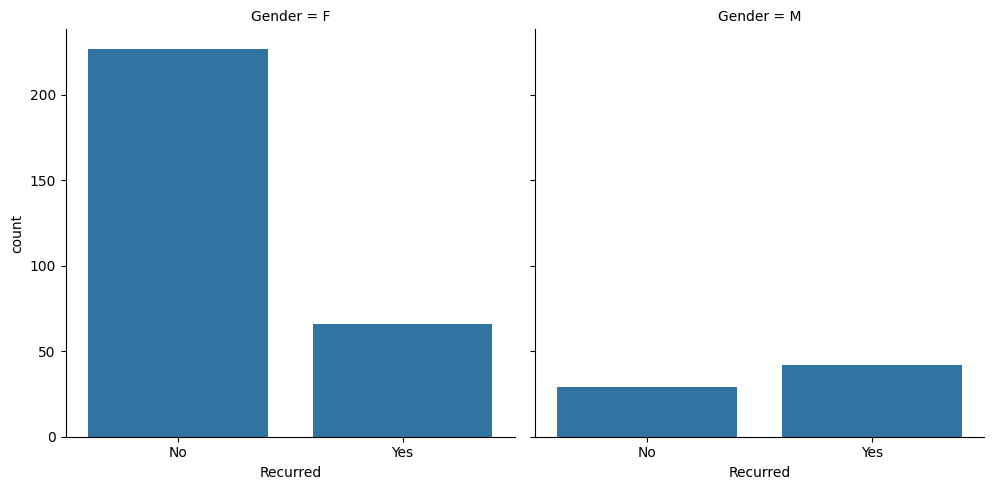

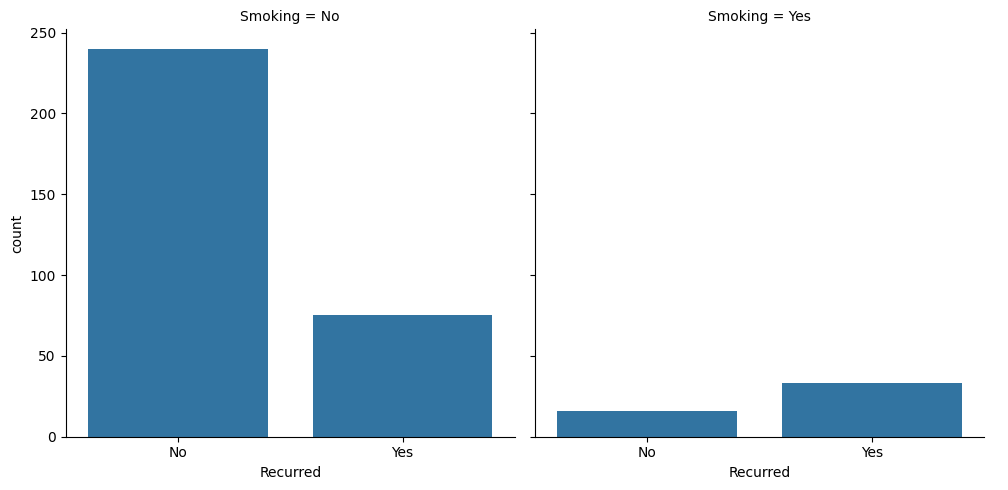

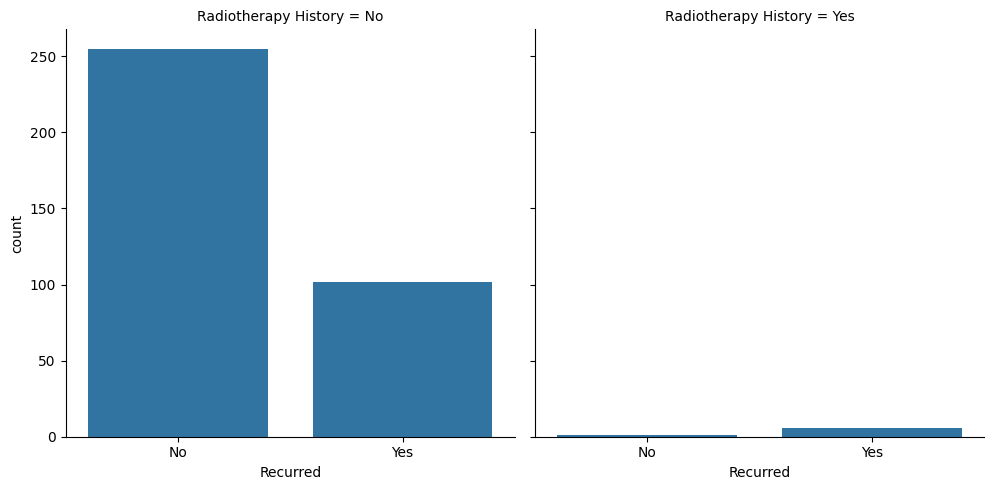

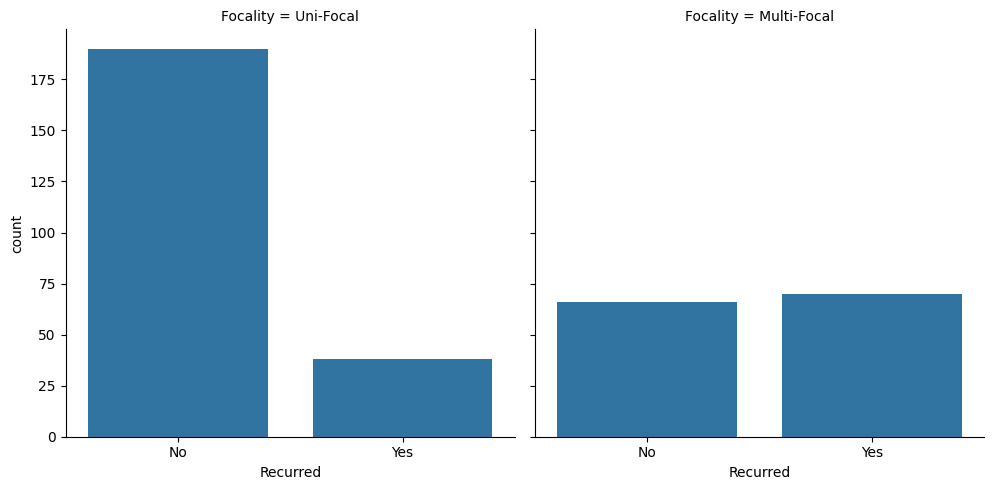

In [32]:
plt.figure(figsize=(8,5))
sns.catplot(x='Recurred', col='Gender', data=df, kind='count')
sns.catplot(x='Recurred', col='Smoking', data=df, kind='count')
sns.catplot(x='Recurred', col='Radiotherapy History', data=df, kind='count')
sns.catplot(x='Recurred', col='Focality', data=df, kind='count')

Here we observe that,

-In first plot,The female patients have more or high chance of cancer recurrence as compared to male.

-In second plot, The non smoker patients have higher chance of cancer recurrence as compared to patients who are smoked.

-In third plot,patients who do not have any history of radiotherapy have a higher chance of cancer recurrence after initial treatment compared to those who have a history of radiotherapy.

-In fourth plot,patients who have multi-focal has high chance of cancer recurrence as compared to uni-focal.

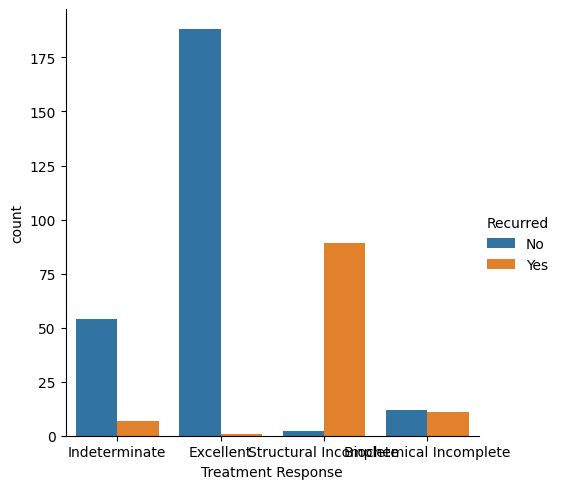

In [33]:
sns.catplot(x='Treatment Response', hue='Recurred', data=df, kind='count')

Here, we observe that patients with indeterminate treatment responses have a higher chance of cancer recurrence compared to those with other treatment responses.

<Axes: xlabel='Adenopathy', ylabel='Age'>

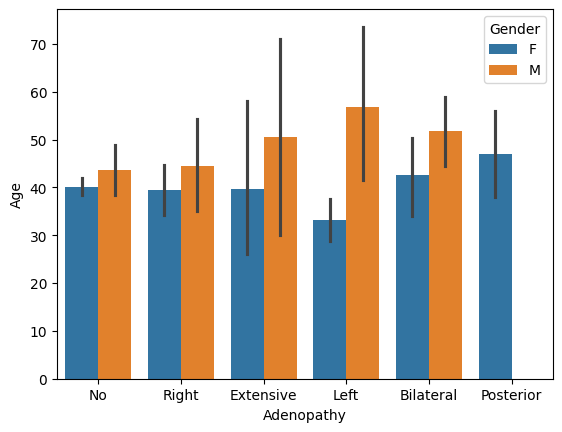

In [34]:
sns.barplot(x='Adenopathy', y='Age', data=df, hue='Gender')

Here we observed that, the male patients have enlarged lymphe node of left neck region.

# Check Outliers

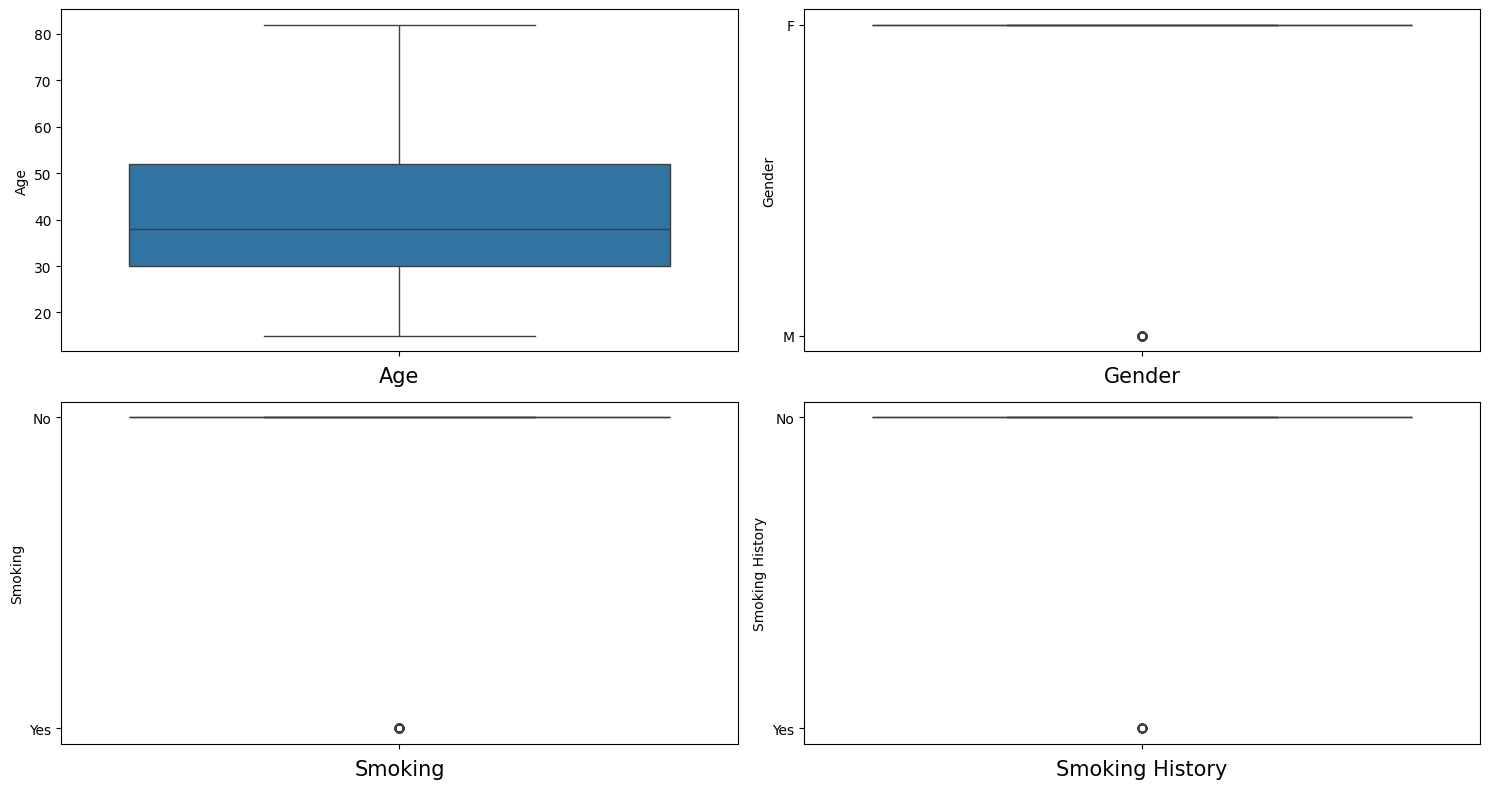

In [35]:
plt.figure(figsize=(15,8))
p = 1

for col in df.columns:
    if p <= 4:
        ax = plt.subplot(2,2,p)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=15)
    p+=1
plt.tight_layout()    

Here we observed only gender and smoking columns has outliers.but these two columns are categorical type.So no need to remove outliers.

# Check Skewness

In [36]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
        
        
df.head() 

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,0.0,0.0,0.0,0.0,2.0,3.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0
1,34,0.0,0.0,1.0,0.0,2.0,1.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
2,30,0.0,0.0,0.0,0.0,2.0,4.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
3,62,0.0,0.0,0.0,0.0,2.0,4.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
4,62,0.0,0.0,0.0,0.0,2.0,1.0,3.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
df.skew()

Age                                    0.678269
Gender                                 1.545558
Smoking                                2.149927
Smoking History                        3.188581
Radiotherapy History                   7.030405
Thyroid Function                      -0.318369
Physical Examination                  -0.211523
Adenopathy                            -0.678109
Types of Thyroid Cancer (Pathology)   -1.889550
Focality                              -0.524622
Risk                                  -1.123289
Tumor                                  0.415121
Lymph Nodes                            0.950388
Cancer Metastasis                      4.173448
Stage                                  3.740144
Treatment Response                     0.392031
Recurred                               0.893769
dtype: float64

In [38]:
# Remove skewness

df['Age'] = np.cbrt(df['Age'])

In [39]:
df.skew()

Age                                    0.259055
Gender                                 1.545558
Smoking                                2.149927
Smoking History                        3.188581
Radiotherapy History                   7.030405
Thyroid Function                      -0.318369
Physical Examination                  -0.211523
Adenopathy                            -0.678109
Types of Thyroid Cancer (Pathology)   -1.889550
Focality                              -0.524622
Risk                                  -1.123289
Tumor                                  0.415121
Lymph Nodes                            0.950388
Cancer Metastasis                      4.173448
Stage                                  3.740144
Treatment Response                     0.392031
Recurred                               0.893769
dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

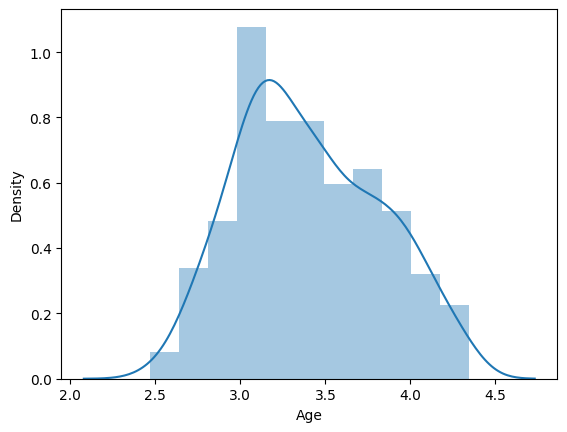

In [40]:
sns.distplot(df['Age'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  364 non-null    float64
 1   Gender                               364 non-null    float64
 2   Smoking                              364 non-null    float64
 3   Smoking History                      364 non-null    float64
 4   Radiotherapy History                 364 non-null    float64
 5   Thyroid Function                     364 non-null    float64
 6   Physical Examination                 364 non-null    float64
 7   Adenopathy                           364 non-null    float64
 8   Types of Thyroid Cancer (Pathology)  364 non-null    float64
 9   Focality                             364 non-null    float64
 10  Risk                                 364 non-null    float64
 11  Tumor                                

In [42]:
df.describe()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,3.404047,0.195055,0.134615,0.076923,0.019231,1.947802,2.530220,2.920330,2.535714,0.626374,1.543956,2.241758,0.571429,0.049451,0.255495,1.604396,0.296703
std,0.418846,0.396788,0.341782,0.266836,0.137524,0.647113,1.344991,1.202259,0.906870,0.484432,0.651966,1.359312,0.870614,0.217105,0.791203,0.931590,0.457433
min,2.466212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.107233,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,3.000000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.361975,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.732511,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000,2.250000,1.000000
max,4.344481,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,5.000000,3.000000,1.000000,2.000000,6.000000,2.000000,1.000000,4.000000,3.000000,1.000000


# Check Correlation

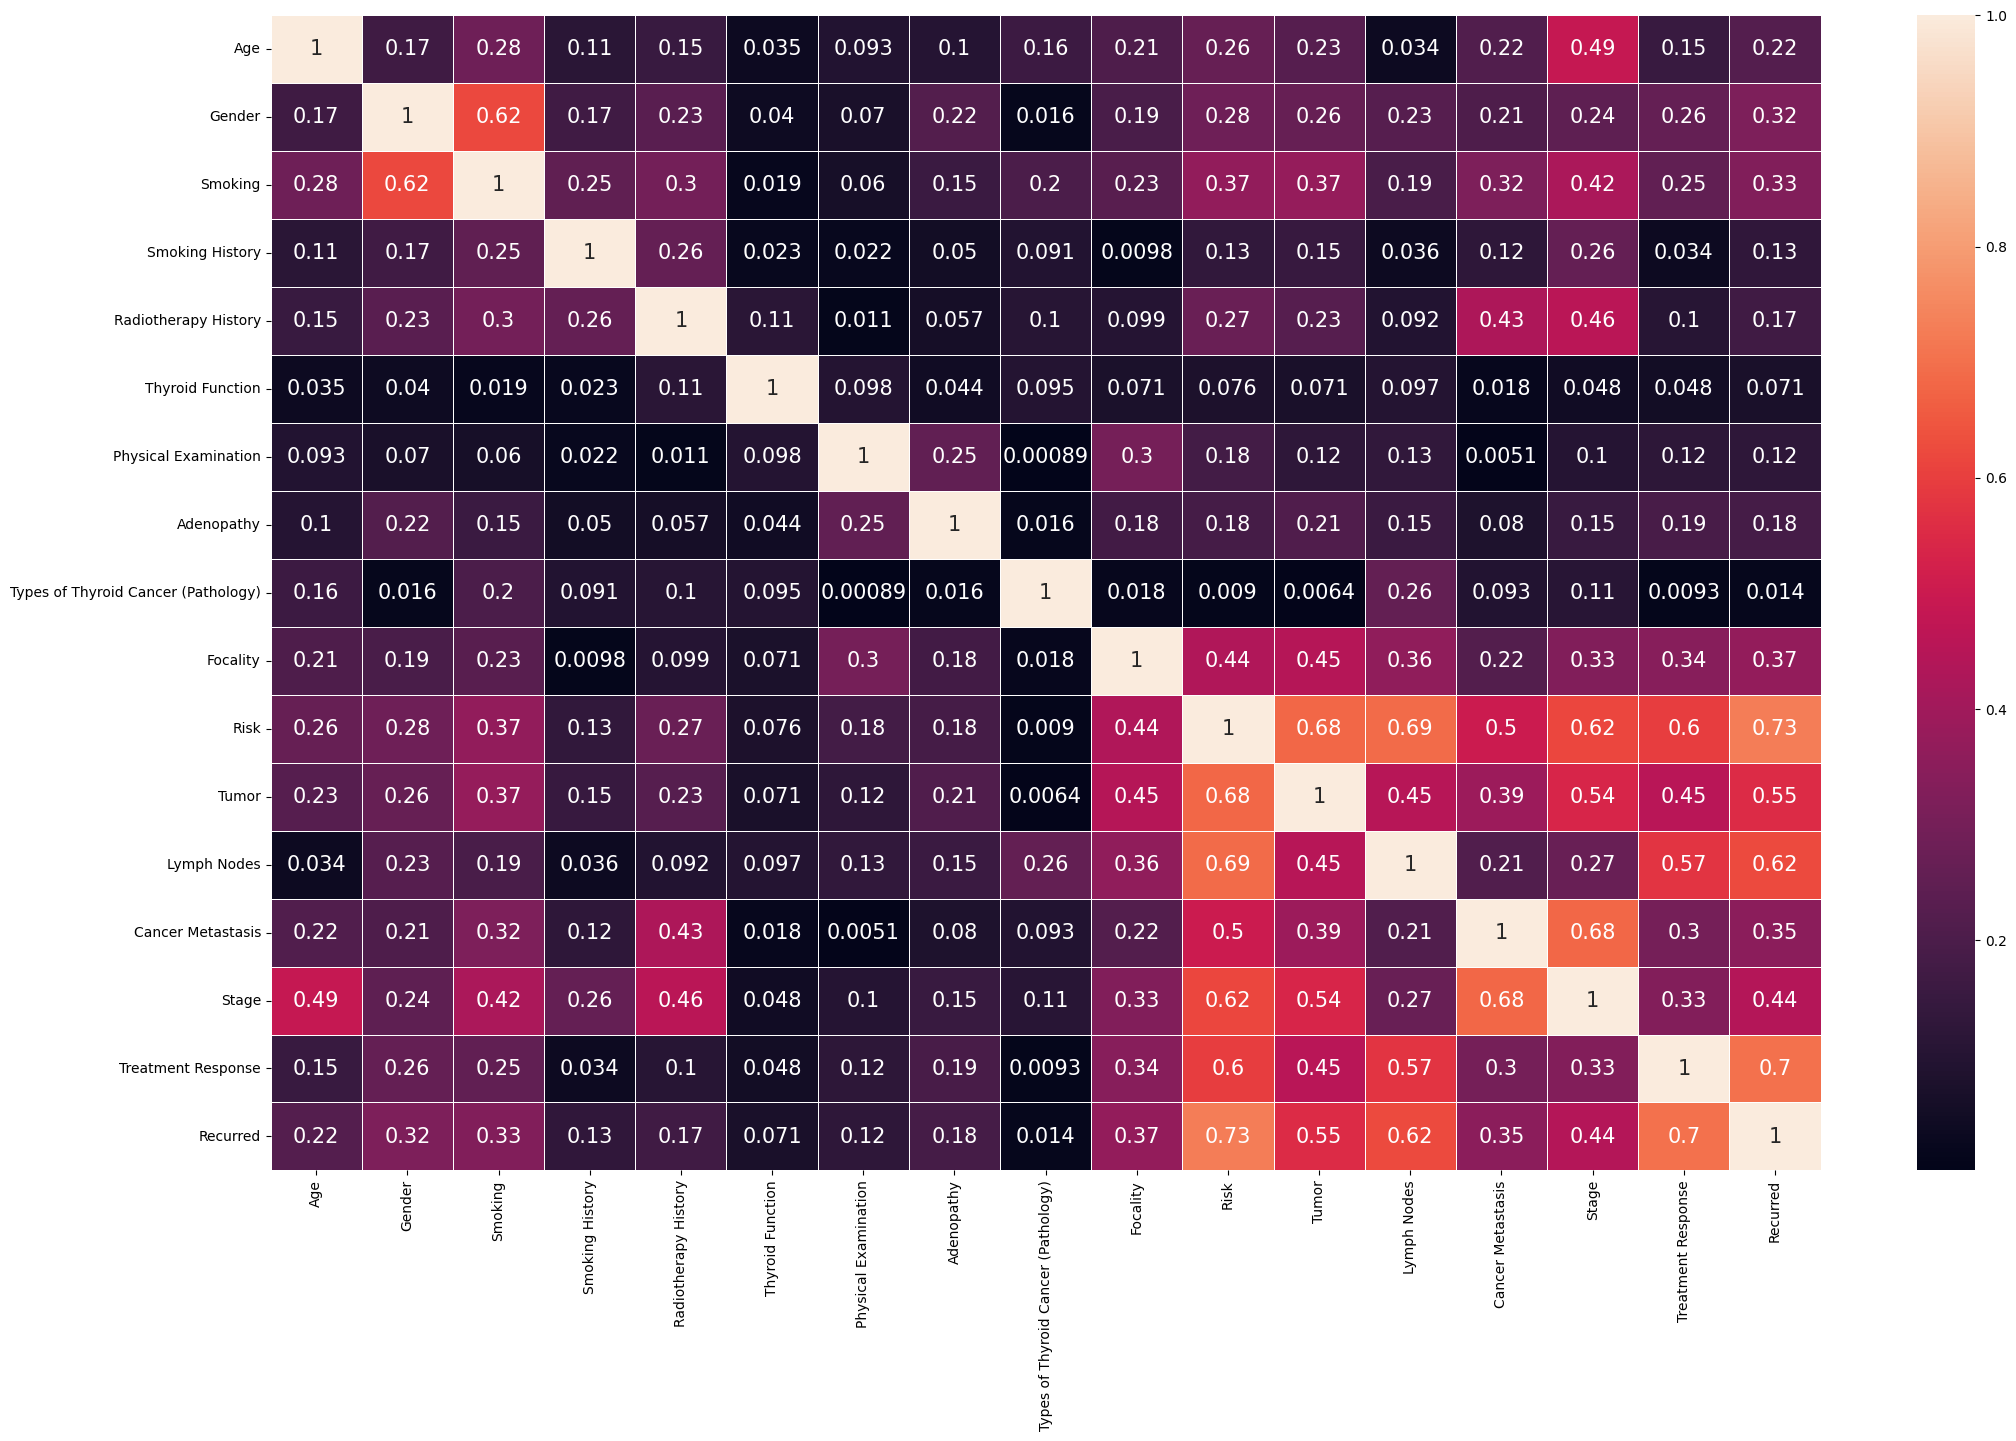

In [43]:
df_corr = df.corr().abs()

plt.figure(figsize=(25,15))
sns.heatmap(df_corr, annot=True, annot_kws={'size':15}, linewidths= 0.4, linecolor='white')
plt.show()

# Divide feature variable and target variable in X and y

In [44]:
X = df.drop('Recurred', axis=1)
y = df['Recurred']

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['Value'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

In [47]:
vif

,Features,Value
0,Age,1.429005
1,Gender,1.745957
2,Smoking,2.024049
3,Smoking History,1.162869
4,Radiotherapy History,1.437117
5,Thyroid Function,1.066003
6,Physical Examination,1.201595
7,Adenopathy,1.150815
8,Types of Thyroid Cancer (Pathology),1.253347
9,Focality,1.465329


# Select best feature using SelectKbest method based on ANOVA F-test

In [60]:
# # Select the top 10 features based on ANOVA F-test

# best_features = SelectKBest(score_func=f_classif, k=10)

# fit = best_features.fit(x,y)

# dataset_scores = pd.DataFrame(fit.scores_)

# dataset_columns = pd.DataFrame(x.columns)

# #concatenate datafreames
# features_scores = pd.concat([dataset_columns,dataset_scores],axis=1)

# features_scores.columns = ['Feature_name','Score']

# print(features_scores.nlargest(10,'Score'))

In [61]:
# Select the top 10 features based on ANOVA F-test

# k_best = SelectKBest(score_func=f_classif, k=10)
# X_train_best = k_best.fit_transform(x_train, y_train)
# X_test_best = k_best.transform(x_test)



In [62]:
y.value_counts()

Recurred
0.0    256
1.0    108
Name: count, dtype: int64

In [63]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE()
# x1, y1 = sm.fit_resample(x,y)

# Split the model into train and test

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model 

In [66]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score,KFold

In [71]:
# RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
print(accuracy_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

0.958904109589041
[[50  1]
 [ 2 20]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        51
         1.0       0.95      0.91      0.93        22

    accuracy                           0.96        73
   macro avg       0.96      0.94      0.95        73
weighted avg       0.96      0.96      0.96        73



In [72]:
k_folds = KFold(n_splits=7)
score = cross_val_score(rfc,x,y,cv=k_folds)
print("Cross Validation Score : {}".format(score))
print("Average Cross Validation Score : {}".format(score.mean()))
print("\n------------------")
accuracy_score(y_test,rfc_pred) - score.mean()

Cross Validation Score : [1.         0.98076923 1.         0.94230769 0.94230769 0.82692308
 0.94230769]
Average Cross Validation Score : 0.9478021978021979

------------------


0.011101911786843166

In [73]:
# ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
etc_pred = etc.predict(x_test)
print(accuracy_score(y_test,etc_pred))
print(confusion_matrix(y_test,etc_pred))
print(classification_report(y_test,etc_pred))

0.958904109589041
[[50  1]
 [ 2 20]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        51
         1.0       0.95      0.91      0.93        22

    accuracy                           0.96        73
   macro avg       0.96      0.94      0.95        73
weighted avg       0.96      0.96      0.96        73



In [74]:
k_folds = KFold(n_splits=7)
score = cross_val_score(etc,x,y,cv=k_folds)
print("Cross Validation Score : {}".format(score))
print("Average Cross Validation Score : {}".format(score.mean()))
print("\n------------------")
accuracy_score(y_test,rfc_pred) - score.mean()

Cross Validation Score : [1.         0.98076923 1.         0.84615385 0.92307692 0.80769231
 0.92307692]
Average Cross Validation Score : 0.9258241758241759

------------------


0.03307993376486518

In [75]:
# GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)
print(accuracy_score(y_test,gbc_pred))
print(confusion_matrix(y_test,gbc_pred))
print(classification_report(y_test,gbc_pred))

0.9178082191780822
[[49  2]
 [ 4 18]]
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        51
         1.0       0.90      0.82      0.86        22

    accuracy                           0.92        73
   macro avg       0.91      0.89      0.90        73
weighted avg       0.92      0.92      0.92        73



In [76]:
k_folds = KFold(n_splits=7)
score = cross_val_score(gbc,x,y,cv=k_folds)
print("Cross Validation Score : {}".format(score))
print("Average Cross Validation Score : {}".format(score.mean()))
print("\n------------------")
accuracy_score(y_test,rfc_pred) - score.mean()

Cross Validation Score : [1.         0.98076923 1.         0.92307692 0.90384615 0.90384615
 0.96153846]
Average Cross Validation Score : 0.9532967032967035

------------------


0.00560740629233758

In [77]:
# AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_pred = abc.predict(x_test)
print(accuracy_score(y_test,abc_pred))
print(confusion_matrix(y_test,abc_pred))
print(classification_report(y_test,abc_pred))

0.9315068493150684
[[48  3]
 [ 2 20]]
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        51
         1.0       0.87      0.91      0.89        22

    accuracy                           0.93        73
   macro avg       0.91      0.93      0.92        73
weighted avg       0.93      0.93      0.93        73



In [78]:
k_folds = KFold(n_splits=7)
score = cross_val_score(abc,x,y,cv=k_folds)
print("Cross Validation Score : {}".format(score))
print("Average Cross Validation Score : {}".format(score.mean()))
print("\n------------------")
accuracy_score(y_test,rfc_pred) - score.mean()

Cross Validation Score : [1.         0.98076923 0.98076923 0.92307692 0.84615385 0.80769231
 0.84615385]
Average Cross Validation Score : 0.9120879120879121

------------------


0.046816197501128975

In [79]:
# DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
print(accuracy_score(y_test,dtc_pred))
print(confusion_matrix(y_test,dtc_pred))
print(classification_report(y_test,dtc_pred))

0.8904109589041096
[[47  4]
 [ 4 18]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        51
         1.0       0.82      0.82      0.82        22

    accuracy                           0.89        73
   macro avg       0.87      0.87      0.87        73
weighted avg       0.89      0.89      0.89        73



In [80]:
k_folds = KFold(n_splits=7)
score = cross_val_score(dtc,x,y,cv=k_folds)
print("Cross Validation Score : {}".format(score))
print("Average Cross Validation Score : {}".format(score.mean()))
print("\n------------------")
accuracy_score(y_test,rfc_pred) - score.mean()

Cross Validation Score : [0.96153846 0.98076923 0.98076923 0.90384615 0.84615385 0.86538462
 0.86538462]
Average Cross Validation Score : 0.9148351648351648

------------------


0.04406894475387624

In [81]:
# LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print(accuracy_score(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))

0.8767123287671232
[[45  6]
 [ 3 19]]
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91        51
         1.0       0.76      0.86      0.81        22

    accuracy                           0.88        73
   macro avg       0.85      0.87      0.86        73
weighted avg       0.88      0.88      0.88        73



In [82]:
k_folds = KFold(n_splits=7)
score = cross_val_score(lr,x,y,cv=k_folds)
print("Cross Validation Score : {}".format(score))
print("Average Cross Validation Score : {}".format(score.mean()))
print("\n------------------")
accuracy_score(y_test,rfc_pred) - score.mean()

Cross Validation Score : [1.         0.96153846 1.         0.71153846 0.80769231 0.75
 0.94230769]
Average Cross Validation Score : 0.881868131868132

------------------


0.07703597772090909

# GradientBoostingClassifier is our best model as the difference between accuracy_score and cross validation score is least.

# Hyper Parameter Tuning

In [83]:
# GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

parametrs = {
    'loss' :['log_loss', 'exponential'],
    'n_estimators' : [50,100,150],
    'learning_rate': [0.1,0.2,0.5],
    'criterion' :['friedman_mse', 'squared_error']
}

In [84]:
gcv = GridSearchCV(GradientBoostingClassifier(),parametrs,cv=7)

In [85]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.2, 0.5],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [50, 100, 150]})

In [86]:
gcv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'exponential',
 'n_estimators': 100}

In [87]:
model = GradientBoostingClassifier(criterion= 'friedman_mse',learning_rate= 0.1,loss= 'exponential',n_estimators= 100)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

93.15068493150685


# Save model

In [88]:
import joblib

joblib.dump(model,'Thyroid_Cancer_prediction.pkl')

['Thyroid_Cancer_prediction.pkl']

In [89]:
m = joblib.load('Thyroid_Cancer_prediction.pkl')

pred = m.predict(x_test)
a= np.array(y_test)
pd.DataFrame({
    'Actual':a,
    'Prediction':pred
})

,Actual,Prediction
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
68,0.0,0.0
69,1.0,1.0
70,0.0,0.0
71,0.0,0.0
